In [ ]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr




ModuleNotFoundError: No module named 'create_processed_csv'

In [3]:
# Download the dataset
!kaggle datasets download jpkochar/obesity-risk-dataset -p ~/Factors_of_Obesity/data --unzip

Dataset URL: https://www.kaggle.com/datasets/jpkochar/obesity-risk-dataset
License(s): MIT
  0%|                                                | 0.00/524k [00:00<?, ?B/s]
100%|█████████████████████████████████████████| 524k/524k [00:00<00:00, 649MB/s]


In [4]:
# Load the dataset
df = pd.read_csv('~/Factors_of_Obesity/data/obesity_level.csv')
df.head(n=1)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad
0,0,Male,24.443011,1.699998,81.66995,1,1,2.0,2.983297,Sometimes,0,2.763573,0,0.0,0.976473,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
# Prints the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  int64  
 6   FAVC                            20758 non-null  int64  
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  int64  
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [6]:
# Prints the summary statistics of the dataframe
df.describe()

,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,0.819636,0.914443,2.445908,2.761332,0.011803,2.029418,0.033096,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.384500,0.279716,0.533218,0.705375,0.108000,0.608467,0.178891,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,1.000000,1.000000,2.000000,3.000000,0.000000,1.792022,0.000000,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,1.000000,1.000000,2.393837,3.000000,0.000000,2.000000,0.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,1.000000,1.000000,3.000000,3.000000,0.000000,2.549617,0.000000,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,1.000000,1.000000,3.000000,4.000000,1.000000,3.000000,1.000000,3.000000,2.000000


# Data Features: Varitey
> This data set includes 20,758 rows and 17 usable columns (The 'id' column will be dropped). The combination of the large record count, relativly small demensiality, the need for a binary outcome, and the fact that the majority of the values are linear in nature make this data a good fit for a Logisitc Regression model. 

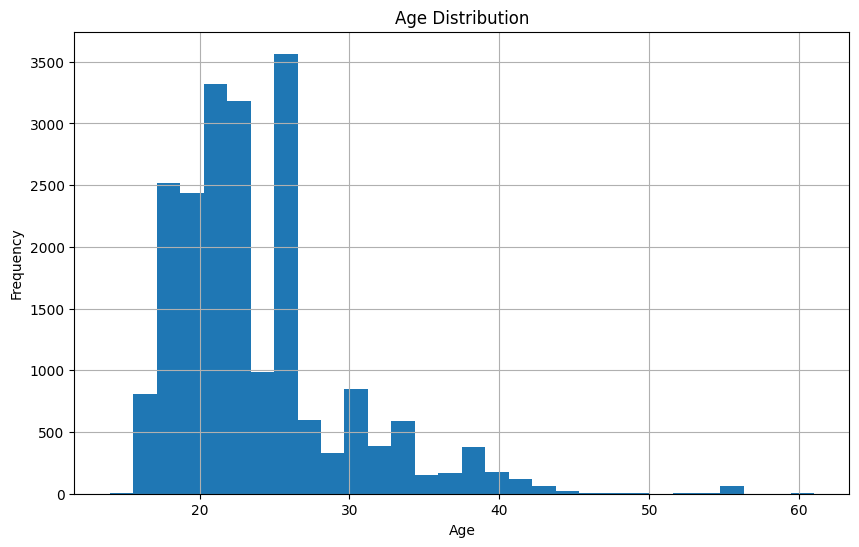

In [7]:
# Visualize the distribution of the 'Age' feature
plt.figure(figsize=(10, 6))
df['Age'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('graphs/age_distribution.png')
plt.show()

# Data Features: Age Distribution
> The age column is heavily right skewed. This distribution of age values could affect the performace of the Logisitc Regression model. For instance, this data could lead to relationships between the ages of 40-60 and an obesity classification to be missed by the model.

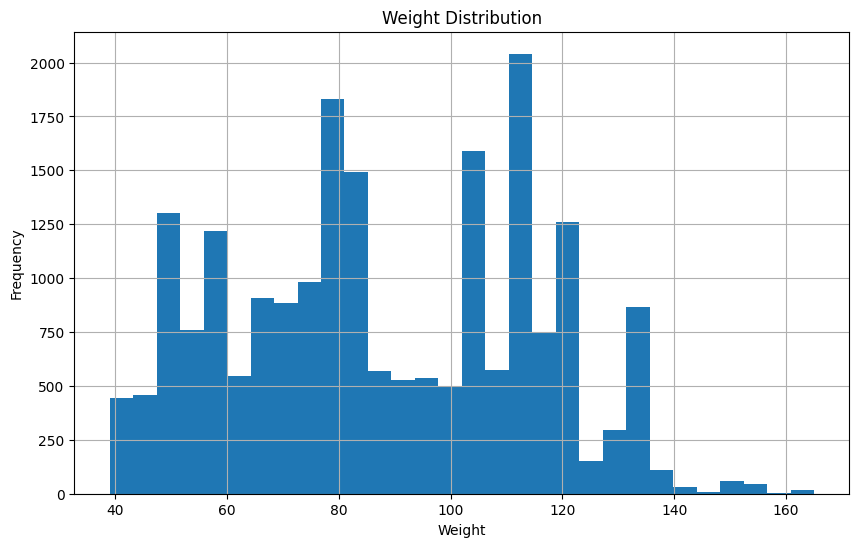

In [8]:
# Visualize the distribution of the 'Weight' feature
plt.figure(figsize=(10, 6))
df['Weight'].hist(bins=30)
plt.title('Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.savefig('graphs/weight_distribution.png')
plt.show()

# Data Features: Weight Distribution
> The weight column, on the other hand, is much more in line with a uniform distribution. There are some outliers  
> past 140, and low record counts between the values of 82 and 102, but otherwise a solid distribution.


In [9]:
# Check for missing values and duplicates
print("Missing values:", df.isnull().sum().sum())
print("Duplicate rows:", df.duplicated().sum())

Missing values: 0
Duplicate rows: 0


# Data Features: Summary

> This data set includes a varity of both genetic history (family obesity history) and personal choices (Smoking). Additionaly, this data set includes a large amount of records and several columns that can be analysed and investigated. This data set does not require additional cleaning but does require processing several variables for use with the Logisitc Regressin model

>The preprocessing.py file in the data folder will take care of the feature scaling, one-hot encoding, and then saving a new preprocesed file. The process is:
1. The dataset is read in and converted to a pandas dataframe.
2. The '0beldad' values are converted into 1 or 0, with 1 representing obese. The '0beldad' and 'id' columns are droped.
3. The binary and categorical columns are identified
4. The binary, catergorical, and other numerical columns are split into different dataframes.
5. The categorical columns are one-hot encoded
6. The other (not including binary) columns are scaleded using the StandardScaler function. 
7. The new processed dataframe is assembled and saved to the data folder.


In [ ]:
# Runs the preprocessing.py file in the data folder and creates a processed CSV file
create_processed_csv('~/Factors_of_Obesity/data/obesity_level.csv', '~/Factors_of_Obesity/data/obesity_level_preprocessed.csv')

obesity_level_preprocessed.csv has been saved to the data folder


In [11]:
# Runs train_model.py
%run model/train_model.py ~/Factors_of_Obesity/data/obesity_level_preprocessed.csv ~/Factors_of_Obesity/data/feature_importance.csv

Training accuracy: 0.9665041940603037
Testing accuracy: 0.9640333975594091
model recall: 0.969301110385369
Model meets the accuracy and recall requirements.

feature_importance.csv has been saved to the data folder


# Model Traning and Evaluation

> The train_model.py file trains the Logisitc Regression model, evaluates it, and saves it if the model meets the requirements. The process is:
1. The input file is read is converted to a panadas dataframe.
2. The training and testing sets are created.
3. A Logisitc Regresion model is trained on the training data set.
4. The model scores are displayed.
5. The model is evaluted against requirments and saved if applicable.
6. Creates the feature_importance dataframe on the models coefficents.
7. The feature_importance dataframe is saved to the data folder

In [12]:
# Creates a feature_importance dataframe
feature_importance = pd.read_csv("~/Factors_of_Obesity/data/feature_importance.csv")

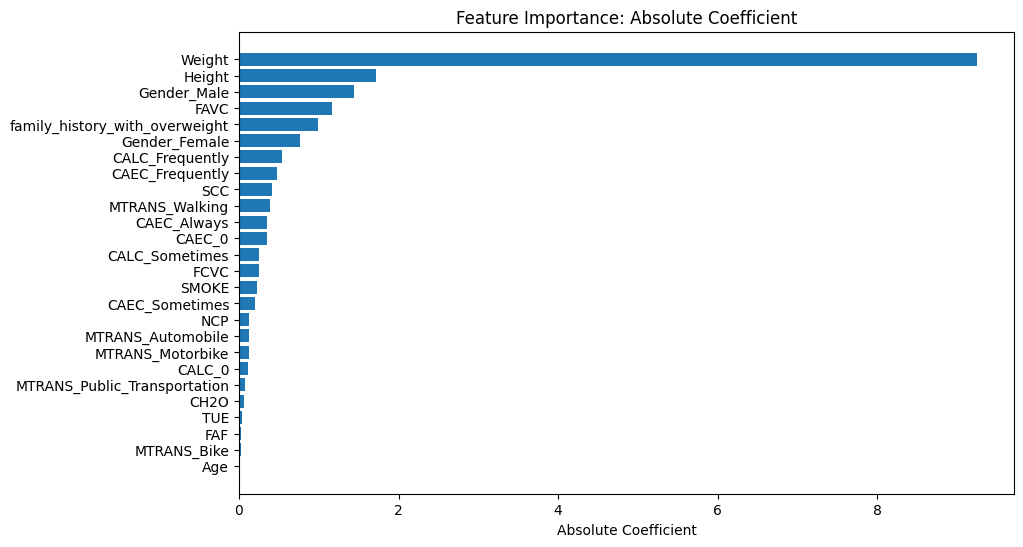

In [14]:
# Visualize feature importance sorted by Absolute Coefficient
feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Absolute_Coefficient'])
plt.xlabel('Absolute Coefficient')
plt.title('Feature Importance: Absolute Coefficient')
plt.savefig('graphs/feature_importance_Absolute_Coefficient.png', bbox_inches='tight')
plt.show()

# Findings: Absolute Coefficient Graph
> While the main point of this project is to identify the top contributers to an obese (1) classification, this graph shoes us some other intresting details. This graphs shows us which factors overall have the most affect on the classification. We can see that the 'Weight' column greatly exceeds any other feature. We also see that factors such as 'age', 'MTRANS_Bike', and 'FAF' have little to no affect on a classification. 

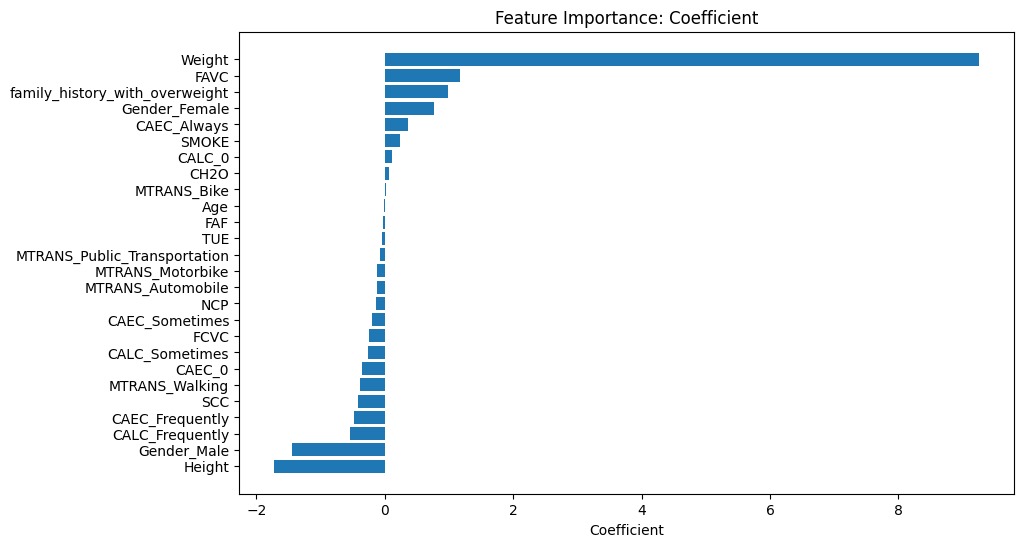

In [15]:
# Restructure dataframe columns and save as a CSV file
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=True)

# Visualize feature importance sorted by Coefficient
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient')
plt.title('Feature Importance: Coefficient')
plt.savefig('graphs/feature_importance_sorted_Coefficient.png', bbox_inches='tight')
plt.show()

# Findings: Coefficient Graph

> Now we see the direction of these coefficients. We see that 'Weight' strongly affects an obese (1) outcome. Not only that, but the next strongest positive coefficients are have less than a quarter of an affect as 'Weight'. The 'FAVC' and 'family_history_with_overweight' are the next two strongest contributiers but have coefficients les than 1.5. 

> Another intresting finding are the factors that contribute to the not obese (0) classification. We see that the largest negative coefficients are 'Height', 'Gender_Male', and 'CALC_Frequently'. While these factors represent the oppisite of what we are investigating, they could provide value in further research. 

In [ ]:
# Display the top 3 features contributing to an obese (1) classification
print(feature_importance.nlargest(3, 'Coefficient'))  # Display top 3 features

                           Feature  Coefficient  Absolute_Coefficient
20                          Weight     9.251844              9.251844
1                             FAVC     1.171772              1.171772
0   family_history_with_overweight     0.984796              0.984796


In [16]:
# Creates df_prep dataframe and a correlation matrix 
df_prep = pd.read_csv('data/obesity_level_preprocessed.csv')
df_prep_matrix = df_prep.corr()

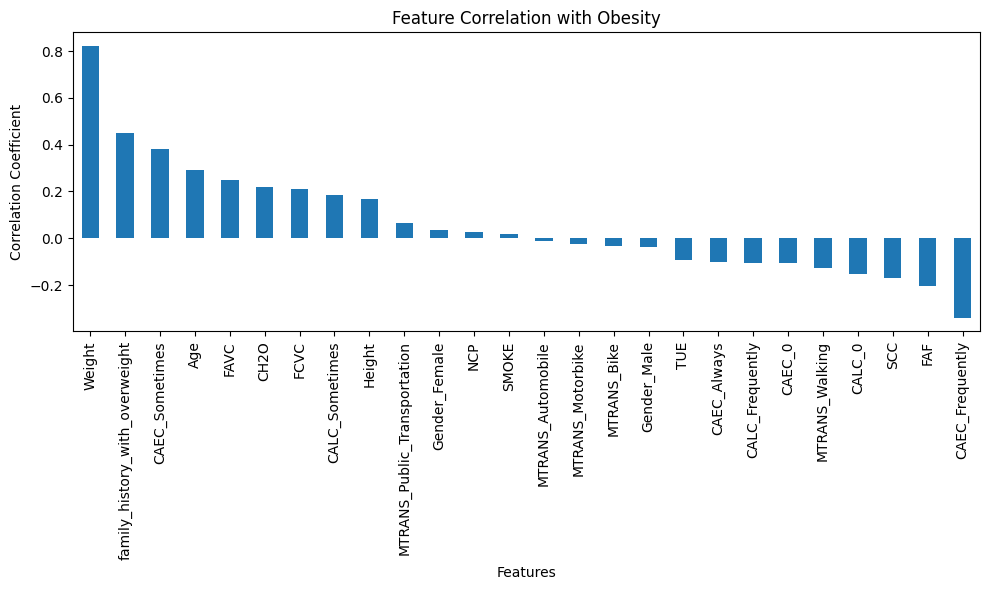

In [17]:
# Visualizes the correlation of features with obesity
obesity_corr = df_prep_matrix['Obese'].sort_values(ascending=False).drop('Obese')
plt.figure(figsize=(10, 6))
obesity_corr.plot(kind='bar')
plt.title('Feature Correlation with Obesity')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.savefig('graphs/obesity_feature_correlation.png', bbox_inches = 'tight')

# Findings: Correlation with Obesity
> This graph is less of 

In [17]:
# Get the top three features and their Pearson correlation with obesity
top_features = feature_importance.nlargest(3, 'Coefficient')
for i in range(len(top_features)):
    feature = top_features.iloc[i]['Feature']
    corr, p_value = pearsonr(df_prep[feature], df_prep['Obese'])
    if p_value < 0.025:
        print(f"Feature: {feature}, Pearson Correlation with Obesity: {corr:.4f}, P-value: {p_value:.4e} (Statistically Significant)")

Feature: Weight, Pearson Correlation with Obesity: 0.8218, P-value: 0.0000e+00 (Statistically Significant)
Feature: FAVC, Pearson Correlation with Obesity: 0.2498, P-value: 9.9404e-293 (Statistically Significant)
Feature: family_history_with_overweight, Pearson Correlation with Obesity: 0.4477, P-value: 0.0000e+00 (Statistically Significant)
